In [1]:
import numpy as np
def read_csv(csv_path):
    # numpy array m sb kuch csv ka
    np_path_XYs = np.genfromtxt(csv_path,delimiter =',')
    # print(np_path_XYs)
    # empty list to store patj
    path_XYs = []
    for i in np . unique ( np_path_XYs [: , 0]):
        npXYs = np_path_XYs [ np_path_XYs [: , 0] == i ][: , 1:]
        XYs = []
        for j in np . unique ( npXYs [: , 0]):
            XY = npXYs [ npXYs [: , 0] == j ][: , 1:]
            XYs . append ( XY )
        path_XYs . append ( XYs )
    return path_XYs


In [2]:
import matplotlib.pyplot as plt
def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define your colors here
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        index=0
        for XY in XYs:
            index=index+1
            # print(index)
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

In [3]:
polylines = read_csv('frag0.csv')

In [4]:
polylines

[[array([[ 41.94200134,  68.98000336],
         [ 41.25960541,  69.81170654],
         [ 40.58875275,  70.65237427],
         [ 39.92960739,  71.50195312],
         [ 39.28233719,  72.36040497],
         [ 38.6471138 ,  73.22766876],
         [ 38.02410889,  74.10371399],
         [ 37.4134903 ,  74.98847961],
         [ 36.81542969,  75.88191986],
         [ 36.23009109,  76.78398895],
         [ 35.65765381,  77.69464874],
         [ 35.09827805,  78.6138382 ],
         [ 34.55213928,  79.54151917],
         [ 34.01940155,  80.47764587],
         [ 33.50024414,  81.42215729],
         [ 32.99482727,  82.37502289],
         [ 32.50332642,  83.33618164],
         [ 32.02590561,  84.30560303],
         [ 31.56274223,  85.28321838],
         [ 31.11400032,  86.26899719],
         [ 30.73366356,  87.13911438],
         [ 30.36473846,  88.0182724 ],
         [ 30.00725937,  88.90615845],
         [ 29.6612606 ,  89.80249023],
         [ 29.3267765 ,  90.70696259],
         [ 29.00383949,  

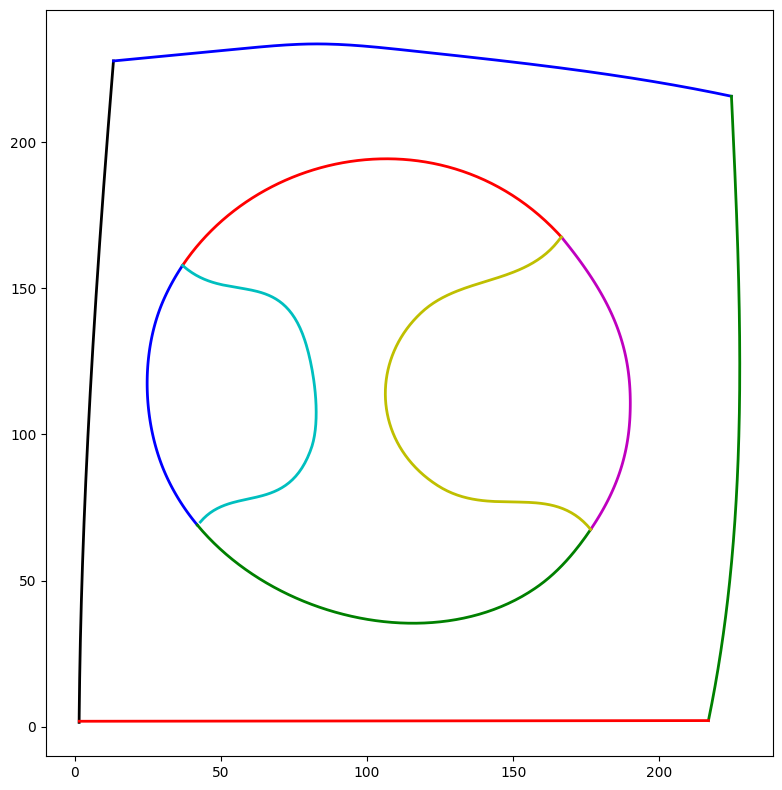

In [5]:
plot(polylines)

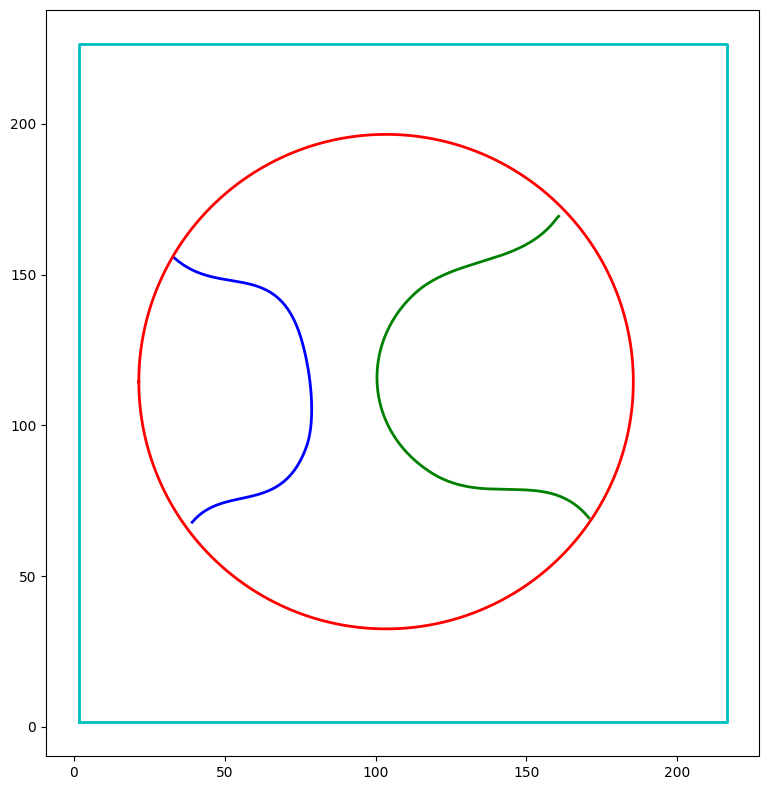

In [6]:
solution_polylines=read_csv('frag01_sol.csv')
plot(solution_polylines)

In [7]:
# The code below will plot each part individually giving the idea which part is which one

def plot_individual_parts(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  
    for i, XYs in enumerate(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        c = colours[i % len(colours)]
        index = 0
        for XY in XYs:
            index += 1
            print(f'Plotting segment {index} of list {i+1}')
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        ax.set_title(f'Plot for nested list {i+1}')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()


In [8]:
def return_individual_figure(polyline,index):
    # step 1 creating the array of the index
    assume_straight=polyline[index]
    assume_left_line_portion_straight=np.array(assume_straight)
    x=assume_left_line_portion_straight[0][:,0]
    y=assume_left_line_portion_straight[0][:,1]
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] 
    c = colours[index % len(colours)]
    plt.plot(x, y, marker='o', linestyle='-', c=c,linewidth=2)

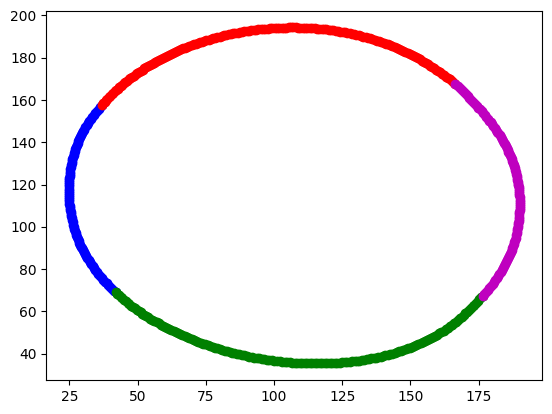

In [11]:
for i in range(0,5):
    if i!=3:
        return_individual_figure(polylines,i)

### Given above represent all polylines combined for formation of a single circle

#### Our work-> Regularize, smooth and fit this circle 

In [12]:
circular_segment_1=np.array(polylines[0])
circular_segment_2=np.array(polylines[1])
circular_segment_3=np.array(polylines[2])
circular_segment_4=np.array(polylines[4])
# these 4 are the segments which are forming the shape

In [13]:
circular_shape=np.concatenate((circular_segment_1,circular_segment_2,circular_segment_3,circular_segment_4),axis=1)

In [14]:
flattened_circula=circular_shape[0]

In [15]:
x = flattened_circula[:, 0]  #all rows and first column
y = flattened_circula[:, 1] #all rows and second column lelo

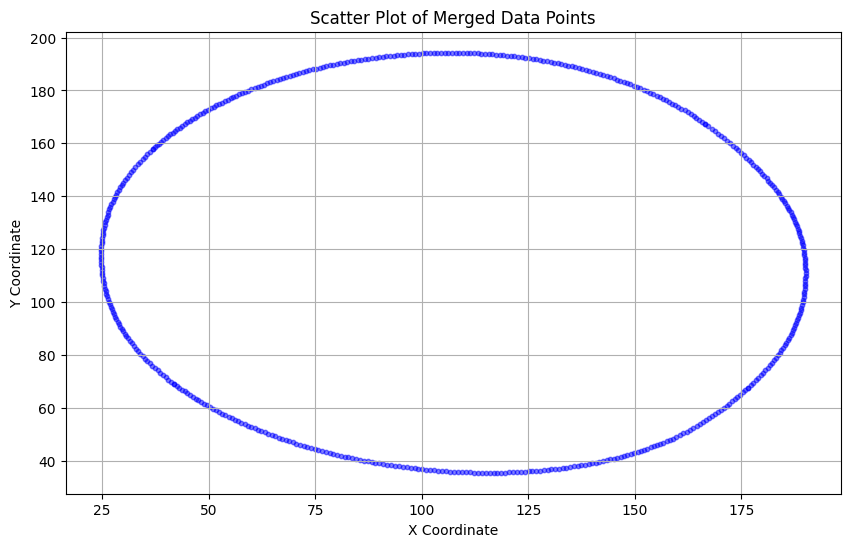

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, c='blue', alpha=0.5)
plt.title('Scatter Plot of Merged Data Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

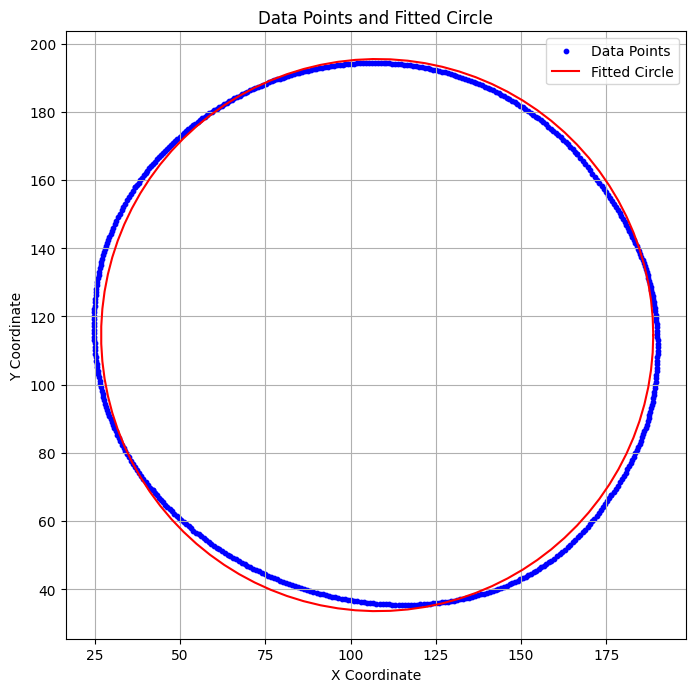

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
def fit_circle(points):
    def circle_residuals(params, x, y):
        a, b, r = params
        return (np.sqrt((x - a)**2 + (y - b)**2) - r)
    
    x0 = np.mean(points[:, 0])
    y0 = np.mean(points[:, 1])
    r0 = np.mean(np.sqrt((points[:, 0] - x0)**2 + (points[:, 1] - y0)**2))
    initial_params = [x0, y0, r0]

    x = points[:, 0]
    y = points[:, 1]
    
    result = least_squares(circle_residuals, initial_params, args=(x, y))
    a, b, r = result.x
    return a, b, r

def plot_points_and_circle(points, a, b, r):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], s=10, c='blue', label='Data Points')
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = a + r * np.cos(theta)
    y_circle = b + r * np.sin(theta)
    plt.plot(x_circle, y_circle, 'r-', label='Fitted Circle')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Data Points and Fitted Circle')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()
points = flattened_circula 
a, b, r = fit_circle(points)
plot_points_and_circle(points, a, b, r)


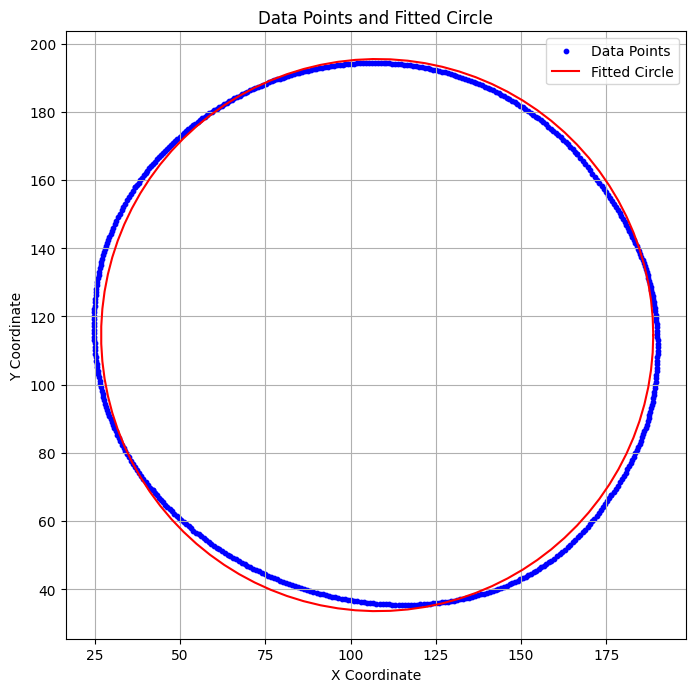

New circle points (as a set of polylines):
[[188.77000371 114.50830523]
 [188.60702268 119.64255006]
 [188.11873585 124.7561211 ]
 [187.30710938 129.82842781]
 [186.1754114  134.83904578]
 [184.72819887 139.76779904]
 [182.97129919 144.59484124]
 [180.91178678 149.30073557]
 [178.55795458 153.86653307]
 [175.91928062 158.27384887]
 [173.00638993 162.50493628]
 [169.83101168 166.54275819]
 [166.405932   170.37105572]
 [162.74494248 173.97441368]
 [158.86278463 177.3383226 ]
 [154.77509053 180.44923723]
 [150.49831989 183.29463099]
 [146.04969374 185.86304649]
 [141.44712513 188.14414164]
 [136.70914699 190.12873126]
 [131.85483748 191.80882412]
 [126.90374319 193.17765507]
 [121.87580044 194.22971231]
 [116.79125496 194.96075958]
 [111.67058043 195.36785322]
 [106.53439601 195.44935399]
 [101.40338328 195.20493373]
 [ 96.29820304 194.63557663]
 [ 91.23941204 193.74357529]
 [ 86.24738024 192.53252148]
 [ 81.34220879 191.00729169]
 [ 76.5436491  189.17402748]
 [ 71.87102325 187.04011075]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def fit_circle(points):
    def circle_residuals(params, x, y):
        a, b, r = params
        return (np.sqrt((x - a)**2 + (y - b)**2) - r)
    
    x0 = np.mean(points[:, 0])
    y0 = np.mean(points[:, 1])
    r0 = np.mean(np.sqrt((points[:, 0] - x0)**2 + (points[:, 1] - y0)**2))
    initial_params = [x0, y0, r0]

    x = points[:, 0]
    y = points[:, 1]
    
    result = least_squares(circle_residuals, initial_params, args=(x, y))
    a, b, r = result.x
    return a, b, r

def plot_points_and_circle(points, a, b, r):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], s=10, c='blue', label='Data Points')
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = a + r * np.cos(theta)
    y_circle = b + r * np.sin(theta)
    plt.plot(x_circle, y_circle, 'r-', label='Fitted Circle')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Data Points and Fitted Circle')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

def get_circle_polyline(a, b, r, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x_circle = a + r * np.cos(theta)
    y_circle = b + r * np.sin(theta)
    return np.column_stack((x_circle, y_circle))

points = np.array(flattened_circula)  # Replace with your actual flattened circular points array
a, b, r = fit_circle(points)
plot_points_and_circle(points, a, b, r)

# Get new circle points as a set of polylines
circle_polyline = get_circle_polyline(a, b, r)
print("New circle points (as a set of polylines):")
print(circle_polyline)


In [19]:
print(circle_polyline.shape)

(100, 2)


In [20]:
x=circle_polyline[:,0]
y=circle_polyline[:,1]

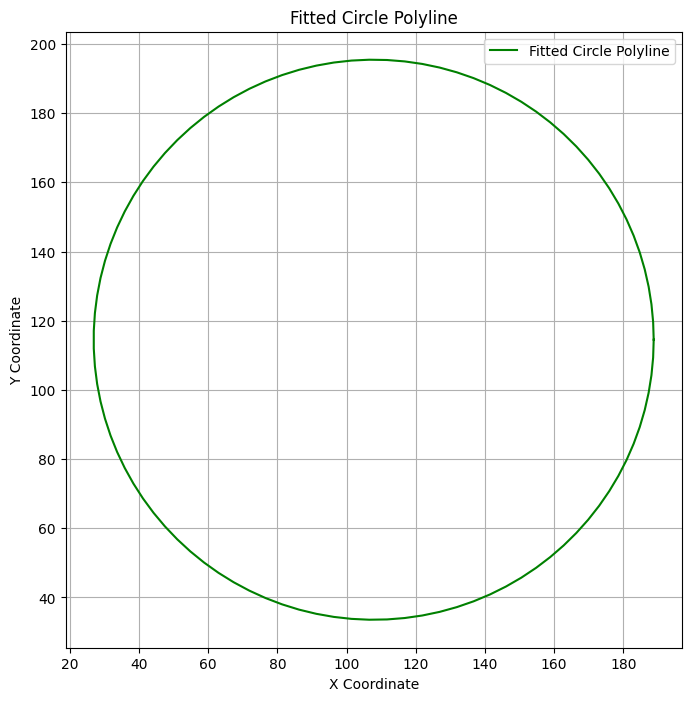

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(circle_polyline[:, 0], circle_polyline[:, 1], 'g-', label='Fitted Circle Polyline')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Fitted Circle Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


#### The plot above is representing my fitted circle as a set of polylines

#### On these points, Now our aim is to add on inner circles

3
5


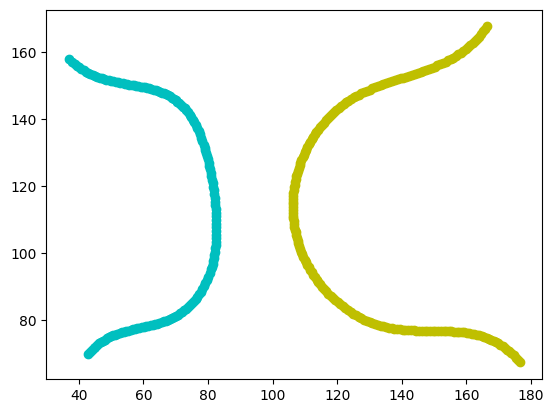

In [86]:
for i in range(0,10):
    if i!=0 and i!=1 and i!=2 and i!=4 and i!=6 and i!=7 and i!=8 and i!=9 and i!=10:
        print(i)
        return_individual_figure(polylines,i)

In [87]:
left_segment=np.array(polylines[3])
right_segment=np.array(polylines[5])

In [88]:
circle_polyline.shape



(100, 2)

In [89]:
print(left_segment.shape)
print(right_segment.shape)

(1, 166, 2)
(1, 205, 2)


In [93]:
x=left_segment[0][:,0]
y=left_segment[0][:,1]

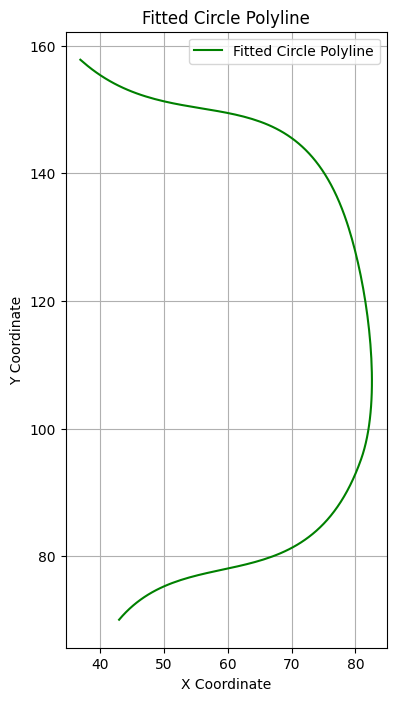

In [94]:
plt.figure(figsize=(8, 8))
plt.plot(x, y,'g-', label='Fitted Circle Polyline')


plt.gca().set_aspect('equal', adjustable='box')
plt.title('Fitted Circle Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


In [95]:
xright=right_segment[0][:,0]
yright=right_segment[0][:,1]

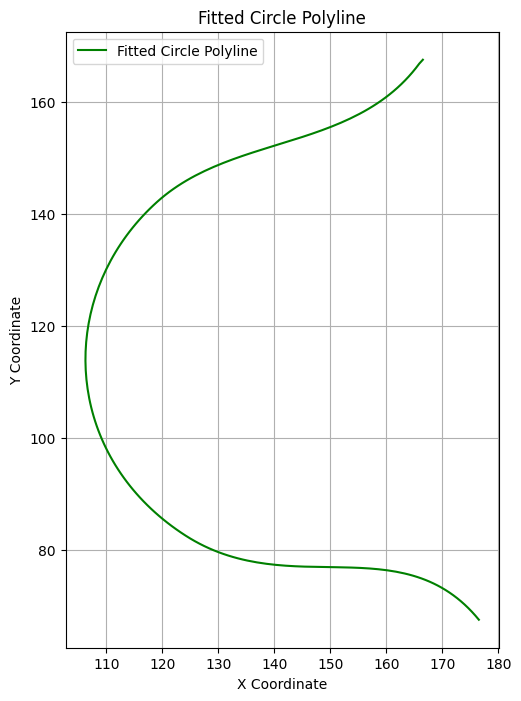

In [96]:
plt.figure(figsize=(8, 8))
plt.plot(xright, yright,'g-', label='Fitted Circle Polyline')


plt.gca().set_aspect('equal', adjustable='box')
plt.title('Fitted Circle Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


In [98]:

tx=np.concatenate([x,xright])
ty=np.concatenate([y,yright])

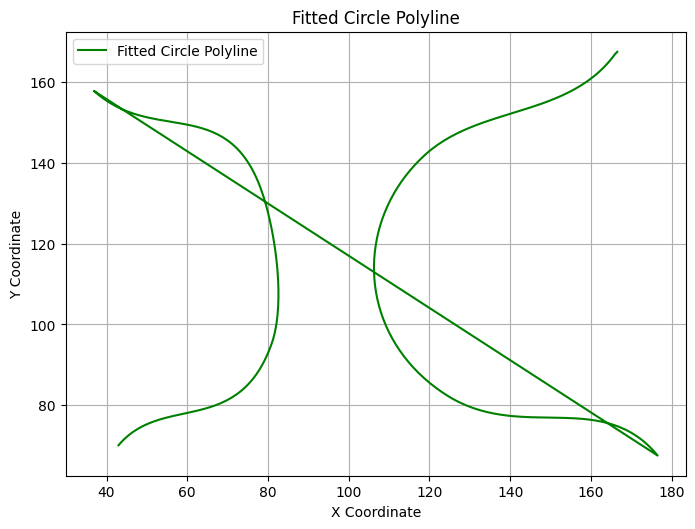

In [99]:
plt.figure(figsize=(8, 8))
plt.plot(tx,ty,'g-', label='Fitted Circle Polyline')


plt.gca().set_aspect('equal', adjustable='box')
plt.title('Fitted Circle Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


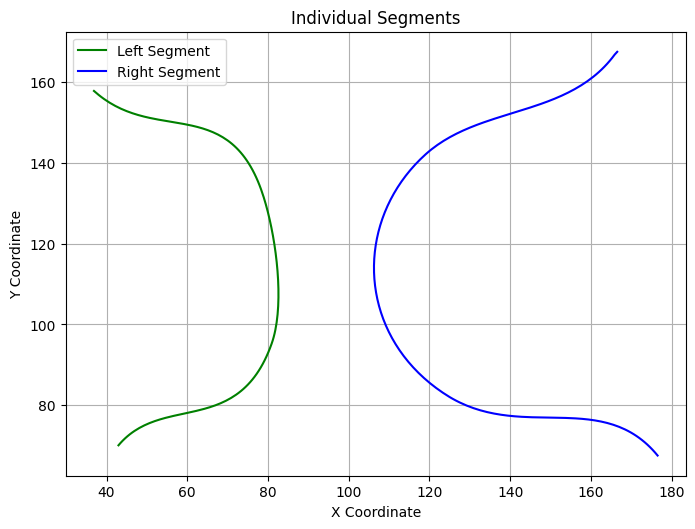

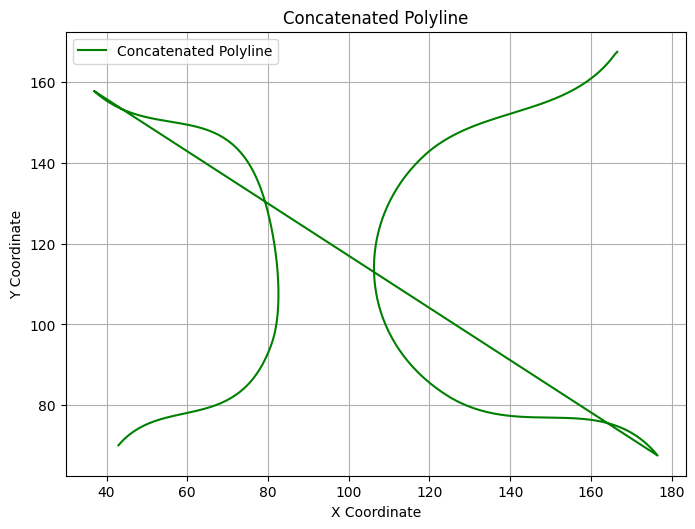

In [101]:
import matplotlib.pyplot as plt
import numpy as np


x = left_segment[0][:,0]
y = left_segment[0][:,1]

xright = right_segment[0][:,0]
yright = right_segment[0][:,1]


plt.figure(figsize=(8, 8))
plt.plot(x, y, 'g-', label='Left Segment')
plt.plot(xright, yright, 'b-', label='Right Segment')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Individual Segments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


tx = np.concatenate([x, xright])
ty = np.concatenate([y, yright
                     ])

plt.figure(figsize=(8, 8))
plt.plot(tx, ty, 'g-', label='Concatenated Polyline')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Concatenated Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


In [103]:
circle_polyline.shape

(100, 2)

In [105]:
tx.shape

(371,)

In [106]:
ty.shape

(371,)

In [107]:
circle_polyline

array([[188.77000371, 114.50830523],
       [188.60702268, 119.64255006],
       [188.11873585, 124.7561211 ],
       [187.30710938, 129.82842781],
       [186.1754114 , 134.83904578],
       [184.72819887, 139.76779904],
       [182.97129919, 144.59484124],
       [180.91178678, 149.30073557],
       [178.55795458, 153.86653307],
       [175.91928062, 158.27384887],
       [173.00638993, 162.50493628],
       [169.83101168, 166.54275819],
       [166.405932  , 170.37105572],
       [162.74494248, 173.97441368],
       [158.86278463, 177.3383226 ],
       [154.77509053, 180.44923723],
       [150.49831989, 183.29463099],
       [146.04969374, 185.86304649],
       [141.44712513, 188.14414164],
       [136.70914699, 190.12873126],
       [131.85483748, 191.80882412],
       [126.90374319, 193.17765507],
       [121.87580044, 194.22971231],
       [116.79125496, 194.96075958],
       [111.67058043, 195.36785322],
       [106.53439601, 195.44935399],
       [101.40338328, 195.20493373],
 

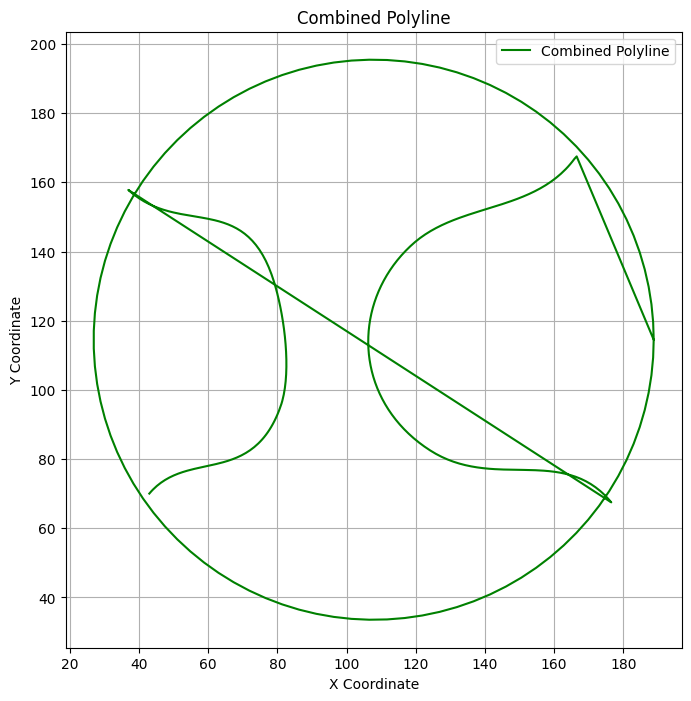

In [109]:
x = left_segment[0][:,0]
y = left_segment[0][:,1]

xright = right_segment[0][:,0]
yright = right_segment[0][:,1]

xcircle = circle_polyline[:,0]
ycircle = circle_polyline[:,1]

# Combine coordinates
tx = np.concatenate([x, xright, xcircle])
ty = np.concatenate([y, yright, ycircle])

# Plot the combined shape
plt.figure(figsize=(8, 8))
plt.plot(tx, ty, 'g-', label='Combined Polyline')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Combined Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

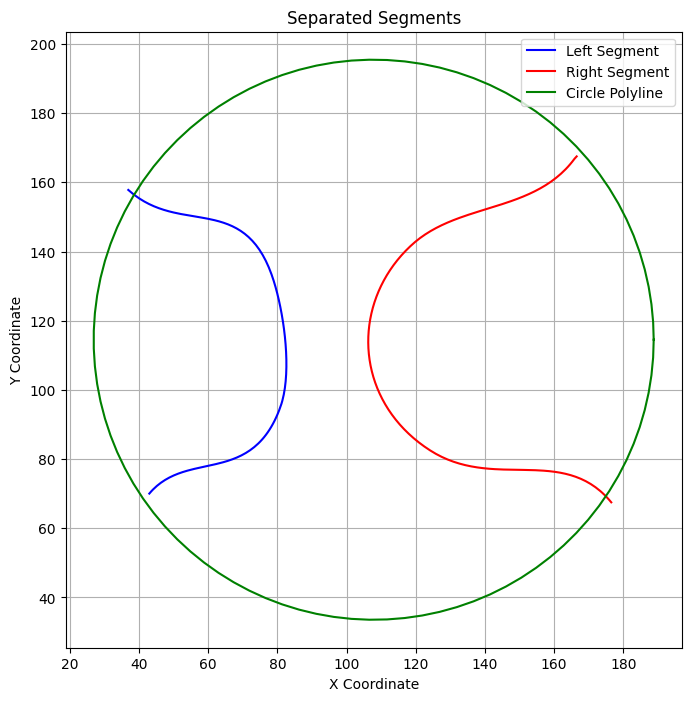

In [112]:
x_left = left_segment[0][:,0]
y_left = left_segment[0][:,1]

x_right = right_segment[0][:,0]
y_right = right_segment[0][:,1]

x_circle = circle_polyline[:,0]
y_circle = circle_polyline[:,1]

plt.figure(figsize=(8, 8))


plt.plot(x_left, y_left, color='blue', label='Left Segment')


plt.plot(x_right, y_right, color='red', label='Right Segment')


plt.plot(x_circle, y_circle, color='green', label='Circle Polyline')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Separated Segments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

### Now , further Addition of symmetrical lines on top of it is needed

In [113]:
def return_linear_coeffecient(polyline,index:int)->float:
    """
    This code will return the factor of linear coeffecient (which shows how much line a given set of polylines is)
    """
    points=polyline[index]
    inner_array=points[0]
    x_coords = inner_array[:, 0]
    y_coords = inner_array[:, 1]
    coefficients = np.polyfit(x_coords, y_coords, 1)
    slope, intercept = coefficients
    y_pred = np.polyval(coefficients, x_coords)
    SS_tot = np.sum((y_coords - np.mean(y_coords))**2)
    SS_res = np.sum((y_coords - y_pred)**2)
    r2 = 1 - (SS_res / SS_tot)
    return f"R^2: {r2}"

    

In [118]:
for i, _ in enumerate(range(10)):
    result = return_linear_coeffecient(polylines, i)
    print(f"Index {i}: {result}")


Index 0: R^2: 0.10747984228077057
Index 1: R^2: 0.025622746239092442
Index 2: R^2: 0.10257845064767701
Index 3: R^2: 0.012679326139448999
Index 4: R^2: 0.2204291911545312
Index 5: R^2: 0.014274543108731885
Index 6: R^2: 0.9695381905334228
Index 7: R^2: 0.6408227956035201
Index 8: R^2: 0.43095076890524664
Index 9: R^2: 0.9999999999990175


### Last 4 segments having most probability of being a line, and they ae

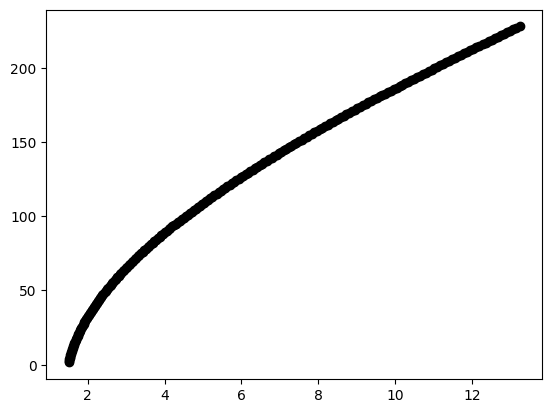

In [121]:
# starting from index 6
return_individual_figure(polylines,6)


In [122]:
first_part_line=polylines[6]
first_part_line

[array([[ 13.24499989, 227.75500488],
        [ 13.16392899, 226.75363159],
        [ 13.08298397, 225.75216675],
        [ 13.0021677 , 224.75062561],
        [ 12.92148018, 223.74899292],
        [ 12.84092426, 222.74728394],
        [ 12.76050186, 221.74549866],
        [ 12.68021393, 220.74363708],
        [ 12.60006332, 219.74168396],
        [ 12.52005005, 218.73965454],
        [ 12.44017792, 217.73754883],
        [ 12.36044788, 216.73536682],
        [ 12.28086185, 215.73310852],
        [ 12.20142078, 214.73075867],
        [ 12.12212753, 213.72834778],
        [ 12.04298306, 212.7258606 ],
        [ 11.96398926, 211.72329712],
        [ 11.885149  , 210.72064209],
        [ 11.80646229, 209.71794128],
        [ 11.72793293, 208.71514893],
        [ 11.64956093, 207.71228027],
        [ 11.57134819, 206.70935059],
        [ 11.49329758, 205.7063446 ],
        [ 11.41541004, 204.70327759],
        [ 11.33768749, 203.70013428],
        [ 11.26013184, 202.69691467],
        [ 11

In [123]:
inner_array = first_part_line[0]

# Separate x and y coordinates
x_coords = inner_array[:, 0]
y_coords = inner_array[:, 1]

In [125]:
coefficients = np.polyfit(x_coords, y_coords, 1)
slope, intercept = coefficients
y_pred = np.polyval(coefficients, x_coords)
SS_tot = np.sum((y_coords - np.mean(y_coords))**2)
SS_res = np.sum((y_coords - y_pred)**2)
r2 = 1 - (SS_res / SS_tot)
print(f"R^2: {r2}")

R^2: 0.9695381905334228


In [127]:
fitted_line_polyline = np.column_stack((x_coords, y_pred))

### COmbining & plotting all 4 of them now

In [131]:
rectangle_line_1=polylines[6]
rectangle_line_2=polylines[7]
rectangle_line_3=polylines[8]
rectangle_line_4=polylines[9]

In [132]:
rect_1=rectangle_line_1[0]
rect_2=rectangle_line_2[0]
rect_3=rectangle_line_3[0]
rect_4=rectangle_line_4[0]

In [133]:
print(rect_1.shape)
print(rect_2.shape)
print(rect_3.shape)
print(rect_4.shape)

(226, 2)
(208, 2)
(215, 2)
(215, 2)


In [134]:
concatenated_rectange=np.concatenate([rect_1,rect_2,rect_3,rect_4])

In [135]:
concatenated_rectange

array([[ 13.24499989, 227.75500488],
       [ 13.16392899, 226.75363159],
       [ 13.08298397, 225.75216675],
       ...,
       [214.76663208,   2.10484123],
       [215.77230835,   2.10592055],
       [216.77799988,   2.10700011]])

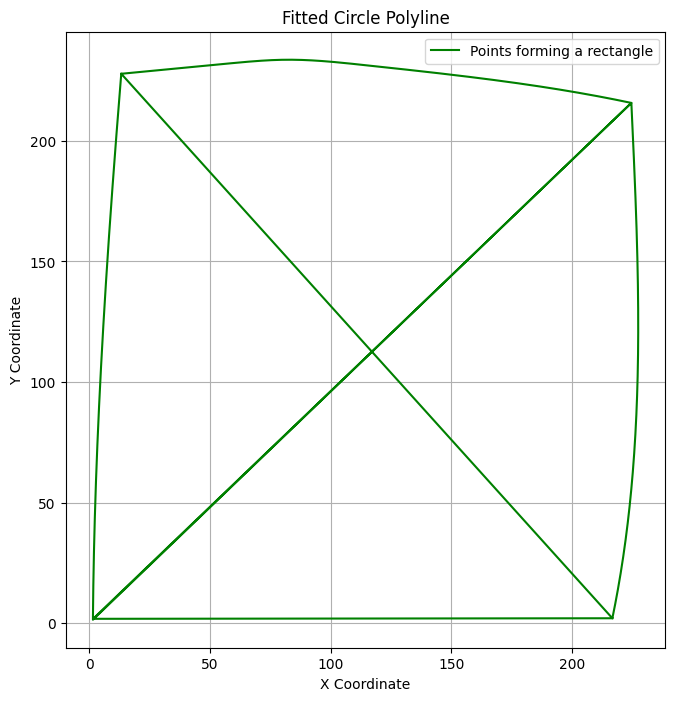

In [137]:
plt.figure(figsize=(8, 8))
plt.plot(concatenated_rectange[:, 0], concatenated_rectange[:, 1], 'g-', label='Points forming a rectangle')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Fitted Circle Polyline')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
combined_polyline = np.vstack([rect_1, rect_2, rect_3, rect_4])

In [139]:
combined_polyline

array([[ 13.24499989, 227.75500488],
       [ 13.16392899, 226.75363159],
       [ 13.08298397, 225.75216675],
       ...,
       [214.76663208,   2.10484123],
       [215.77230835,   2.10592055],
       [216.77799988,   2.10700011]])

In [140]:
concatenated_rectange


array([[ 13.24499989, 227.75500488],
       [ 13.16392899, 226.75363159],
       [ 13.08298397, 225.75216675],
       ...,
       [214.76663208,   2.10484123],
       [215.77230835,   2.10592055],
       [216.77799988,   2.10700011]])

In [141]:
from scipy.optimize import minimize
import numpy as np

def rectangle_fit(polyline):
    def objective(params):
        x0, y0, width, height = params
        rect_points = np.array([
            [x0, y0],
            [x0 + width, y0],
            [x0 + width, y0 + height],
            [x0, y0 + height],
            [x0, y0]
        ])
        distances = np.sqrt(((polyline[:, None, :] - rect_points[None, :, :]) ** 2).sum(axis=2))
        return distances.min(axis=1).sum()

    initial_params = [0, 0, 1, 1]  # Initial guess
    result = minimize(objective, initial_params, bounds=[(-np.inf, np.inf), (-np.inf, np.inf), (0, np.inf), (0, np.inf)])
    return result.x

# Fit the rectangle
params = rectangle_fit(combined_polyline)
x0, y0, width, height = params


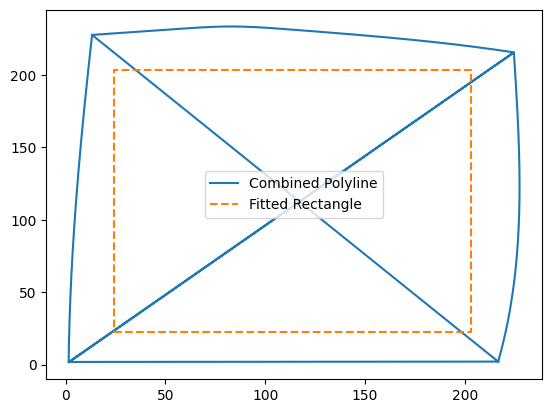

In [142]:
import matplotlib.pyplot as plt


rect_points = np.array([
    [x0, y0],
    [x0 + width, y0],
    [x0 + width, y0 + height],
    [x0, y0 + height],
    [x0, y0]
])

# Plot results
plt.figure()
plt.plot(combined_polyline[:, 0], combined_polyline[:, 1], label='Combined Polyline')
plt.plot(rect_points[:, 0], rect_points[:, 1], label='Fitted Rectangle', linestyle='--')
plt.legend()
plt.show()


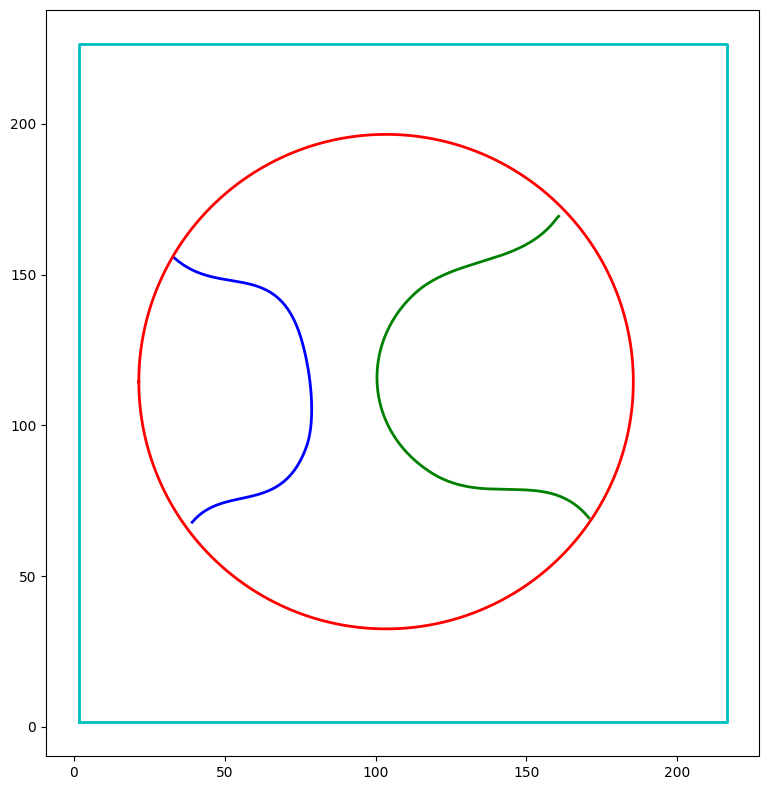

In [143]:
solution_polylines=read_csv('frag01_sol.csv')
plot(solution_polylines)

In [145]:
import numpy as np

def rotate_points(points, angle):
    """Rotate points by a given angle in radians."""
    c, s = np.cos(angle), np.sin(angle)
    rotation_matrix = np.array([[c, -s], [s, c]])
    return points @ rotation_matrix.T

def align_to_axis(polyline):
    """Align each line segment to the x or y axis."""
    angles = np.arctan2(polyline[1:, 1] - polyline[:-1, 1], polyline[1:, 0] - polyline[:-1, 0])
    angle = np.mean(angles)  # Average angle to align
    return rotate_points(polyline, -angle)

# Example usage
straightened_polylines = [align_to_axis(polyline) for polyline in [rect_1,rect_2,rect_3,rect_4]]


In [146]:
def calculate_bounds(polyline):
    """Calculate the bounds of the given polyline."""
    min_x, min_y = np.min(polyline, axis=0)
    max_x, max_y = np.max(polyline, axis=0)
    return max_x - min_x, max_y - min_y

widths, heights = zip(*(calculate_bounds(polyline) for polyline in straightened_polylines))
total_width = sum(widths)
total_height = max(heights)


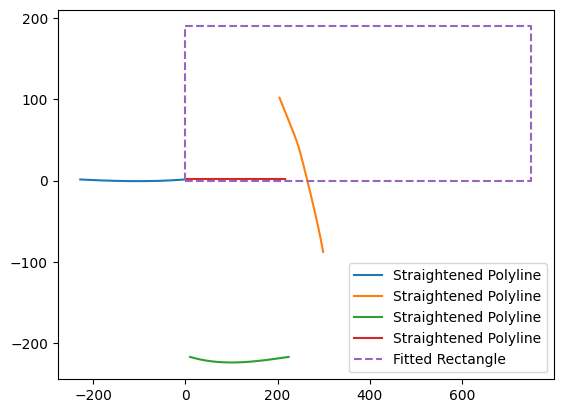

In [147]:
import matplotlib.pyplot as plt

def plot_rectangle(width, height):
    """Plot a rectangle with given width and height."""
    rectangle = np.array([
        [0, 0],
        [width, 0],
        [width, height],
        [0, height],
        [0, 0]
    ])
    return rectangle


rectangle = plot_rectangle(total_width, total_height)

# Plot results
plt.figure()
for polyline in straightened_polylines:
    plt.plot(polyline[:, 0], polyline[:, 1], label='Straightened Polyline')

plt.plot(rectangle[:, 0], rectangle[:, 1], label='Fitted Rectangle', linestyle='--')
plt.legend()
plt.show()


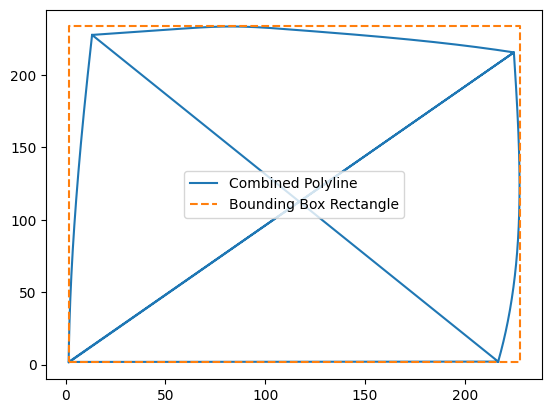

In [148]:
import numpy as np
import matplotlib.pyplot as plt

def bounding_box(polyline):
    min_x, max_x = np.min(polyline[:, 0]), np.max(polyline[:, 0])
    min_y, max_y = np.min(polyline[:, 1]), np.max(polyline[:, 1])
    
    x0, y0 = min_x, min_y
    width, height = max_x - min_x, max_y - min_y
    
    return x0, y0, width, height


x0, y0, width, height = bounding_box(combined_polyline)

rect_points = np.array([
    [x0, y0],
    [x0 + width, y0],
    [x0 + width, y0 + height],
    [x0, y0 + height],
    [x0, y0]
])


plt.figure()
plt.plot(combined_polyline[:, 0], combined_polyline[:, 1], label='Combined Polyline')
plt.plot(rect_points[:, 0], rect_points[:, 1], label='Bounding Box Rectangle', linestyle='--')
plt.legend()
plt.show()


In [150]:
print(rect_points.shape)

(5, 2)


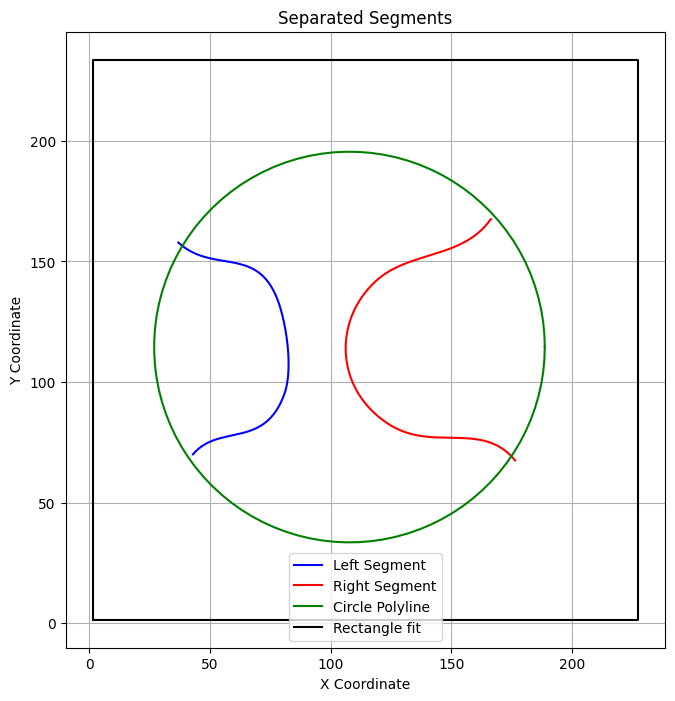

In [152]:
x_left = left_segment[0][:,0]
y_left = left_segment[0][:,1]

x_right = right_segment[0][:,0]
y_right = right_segment[0][:,1]

x_circle = circle_polyline[:,0]
y_circle = circle_polyline[:,1]

plt.figure(figsize=(8, 8))


plt.plot(x_left, y_left, color='blue', label='Left Segment')


plt.plot(x_right, y_right, color='red', label='Right Segment')


plt.plot(x_circle, y_circle, color='green', label='Circle Polyline')
plt.plot(rect_points[:,0],rect_points[:,1],color='black',label='Rectangle fit')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Separated Segments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

## ORIGINAL SOLUTION GIVEN IN PS

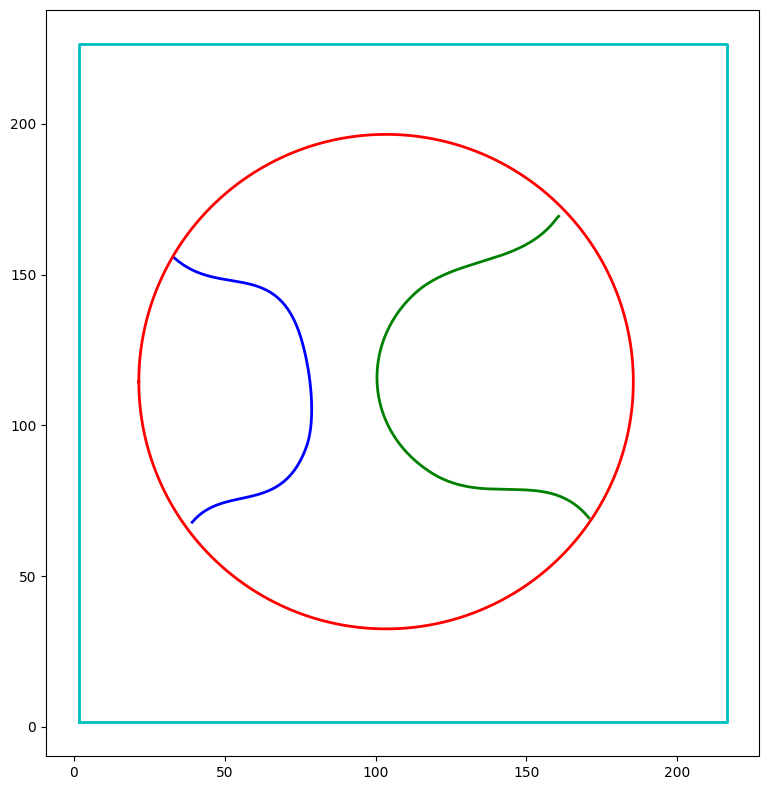

In [153]:
solution_polylines=read_csv('frag01_sol.csv')
plot(solution_polylines)

## SOLUTION GIVEN BY US

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


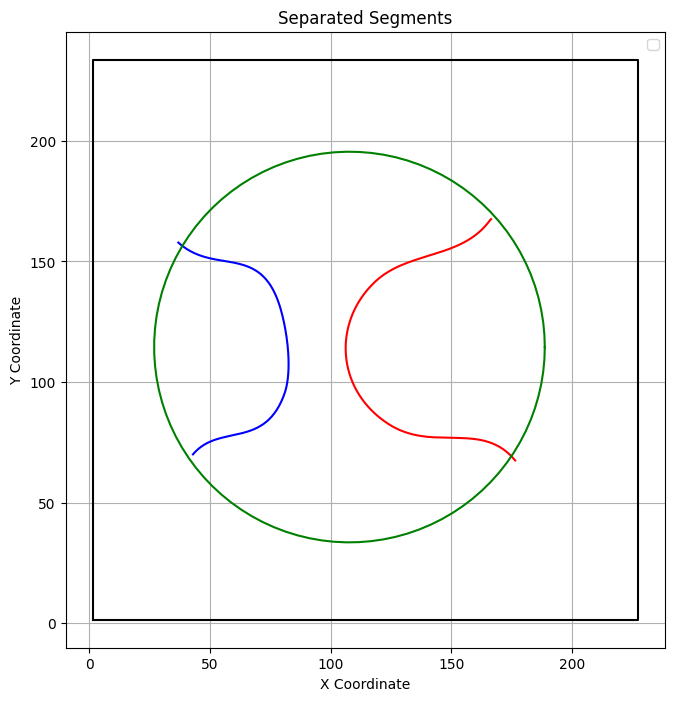

In [155]:
x_left = left_segment[0][:,0]
y_left = left_segment[0][:,1]

x_right = right_segment[0][:,0]
y_right = right_segment[0][:,1]

x_circle = circle_polyline[:,0]
y_circle = circle_polyline[:,1]

plt.figure(figsize=(8, 8))


plt.plot(x_left, y_left, color='blue')


plt.plot(x_right, y_right, color='red')


plt.plot(x_circle, y_circle, color='green')
plt.plot(rect_points[:,0],rect_points[:,1],color='black')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Separated Segments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()